# ESCI 445 - Programming Exercise 3

## Calculating Geostrophic Wind from Streamfunction Array

Variables

+ nx: number of x data points
+ ny: number of y data points
+ dx: spacing between data points
+ psi: streamfunction (read from file)
+ u: <i>u</i>-component of geostrophic wind
+ v: <i>v</i>-component of geostrophic wind

#### Import numpy and read data values into a NumPy array.  <font color = 'blue'><i>Note: You may need to include the entire directory path to the file.  This depends on your version of iPython Notebook.</i></font>

In [1]:
import numpy as np

fin = 'streamfunction_input.dat' # Input file name

psi = np.transpose(np.loadtxt(fin)) # Read data from file into NumPy array named data

#### Set up some parameters and arrays

In [2]:
# Set some parameters
dx = 5e4    #   Data spacing in meters
nx, ny = np.shape(psi)  # Determines number of data points in x and y directions

# Create arrays to hold geostrophic wind components
u = np.ndarray((nx,ny), dtype = np.float_)
u.fill(0)
v = np.copy(u)

#### <font color = 'blue'><i>*Calculate <i>u</i>-component of geostrophic wind

In [3]:
# Write your code here
for j in range(1,ny-1):
    for i in range(0,nx):
        u[i,j] = -(psi[i,j+1] - psi[i,j-1]) / (2*dx)

#### <font color = 'blue'><i>*Calculate <i>v</i>-component of geostrophic wind

In [4]:
# Write your code here
for j in range(0,ny):
    for i in range(1,nx-1):
        v[i,j] = (psi[i+1,j] - psi[i-1,j]) / (2*dx)

#### Display plots

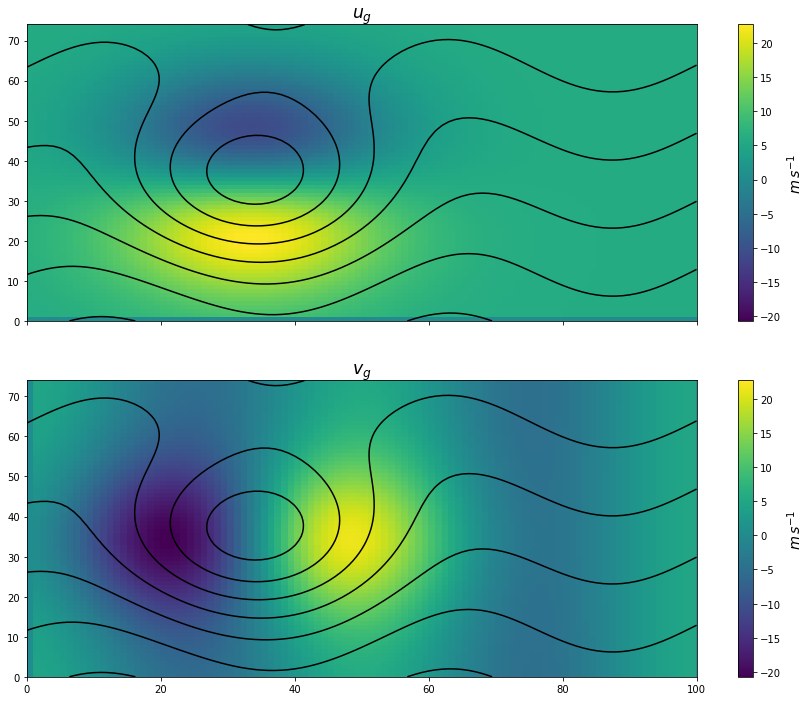

In [5]:
inline = True # Set False for interactive plots; True for inline plots

import matplotlib.pyplot as plt
from matplotlib import rcParams

if inline:
    %matplotlib inline
    rcParams['figure.figsize'] = (15, 12.0)
else:
    %matplotlib
    rcParams['figure.figsize'] = (7.5, 6.0)
    
max_s, min_s = max((np.max(u),np.max(v))), min((np.min(u),np.min(v)))

fig, ax = plt.subplots(2,1,sharex=True,sharey=True)

data = (u, v)
title = (r'$u_g$', r'$v_g$')

for i, a in enumerate(ax):
    pc = a.pcolor(np.transpose(data[i]),vmin = min_s, vmax = max_s)
    a.set_xlim(0,nx-1)
    a.set_ylim(0,ny-1)
    cb = plt.colorbar(pc,ax = a)
    cb.set_label(r'$m\/s^{-1}$', size = 'x-large')
    a.contour(np.transpose(psi), colors = 'black')
    a.set_title(title[i], size = 'xx-large')

plt.show()